In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("india_trade/2018-2010_import.csv")

In [3]:
df.head()

,HSCode,Commodity,value,country,year
0,5,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...",0.00,AFGHANISTAN TIS,2018
1,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,12.38,AFGHANISTAN TIS,2018
2,8,EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR...,268.60,AFGHANISTAN TIS,2018
3,9,"COFFEE, TEA, MATE AND SPICES.",35.48,AFGHANISTAN TIS,2018
4,11,PRODUCTS OF THE MILLING INDUSTRY; MALT; STARCH...,NaN,AFGHANISTAN TIS,2018


In [4]:
df.shape

(93095, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93095 entries, 0 to 93094
Data columns (total 5 columns):
HSCode       93095 non-null int64
Commodity    93095 non-null object
value        79068 non-null float64
country      93095 non-null object
year         93095 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 3.6+ MB


In [6]:
df.isna().sum()

HSCode           0
Commodity        0
value        14027
country          0
year             0
dtype: int64

In [7]:
df.isna()

,HSCode,Commodity,value,country,year
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,True,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


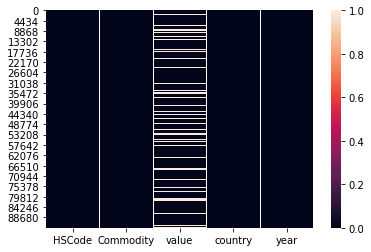

In [8]:
sns.heatmap(df.isna())

In [9]:
df.dropna(inplace=True)

In [10]:
df.shape

(79068, 5)

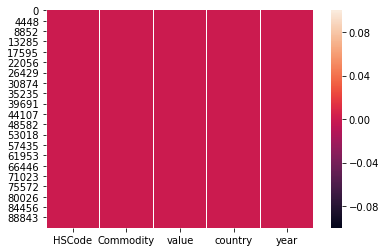

In [11]:
sns.heatmap(df.isna())

In [12]:
df.isna().sum()

HSCode       0
Commodity    0
value        0
country      0
year         0
dtype: int64

# So now lets move to some visulization part with this data set

year
2010    AxesSubplot(0.125,0.125;0.775x0.755)
2011    AxesSubplot(0.125,0.125;0.775x0.755)
2012    AxesSubplot(0.125,0.125;0.775x0.755)
2013    AxesSubplot(0.125,0.125;0.775x0.755)
2014    AxesSubplot(0.125,0.125;0.775x0.755)
2015    AxesSubplot(0.125,0.125;0.775x0.755)
2016    AxesSubplot(0.125,0.125;0.775x0.755)
2017    AxesSubplot(0.125,0.125;0.775x0.755)
2018    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

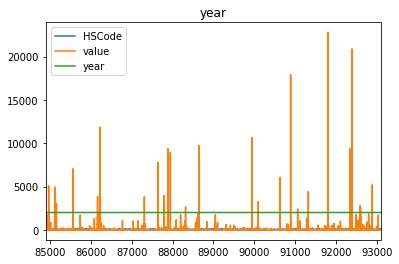

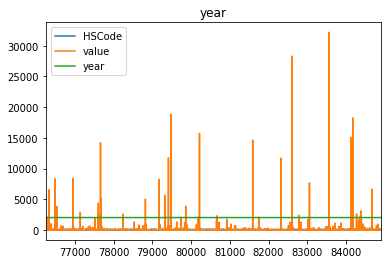

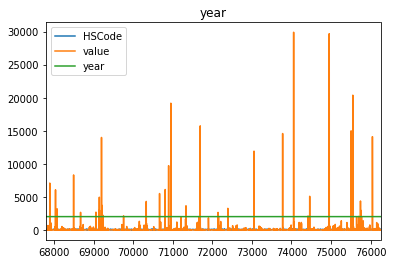

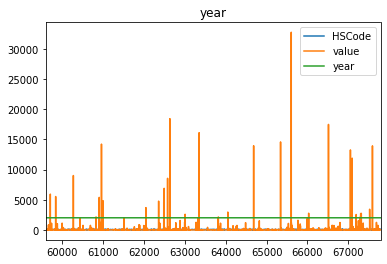

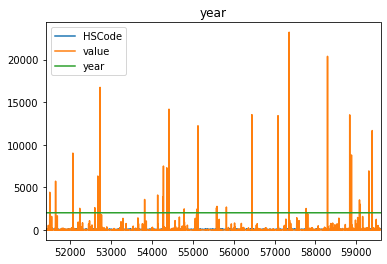

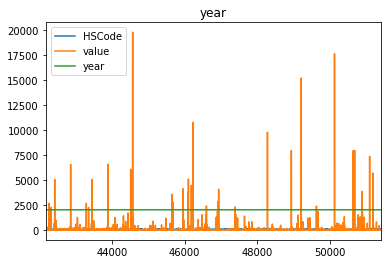

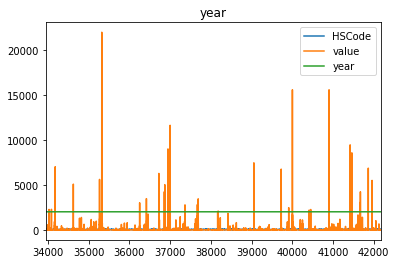

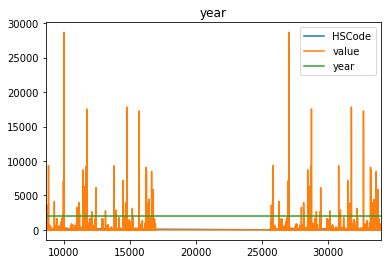

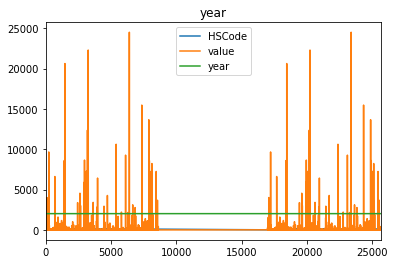

In [13]:
df.groupby("year").plot(title="year")

In [14]:
df_group = df.groupby("year")

# Getting the importing amount details over the years

In [15]:
imp_years = df_group.sum()["value"]

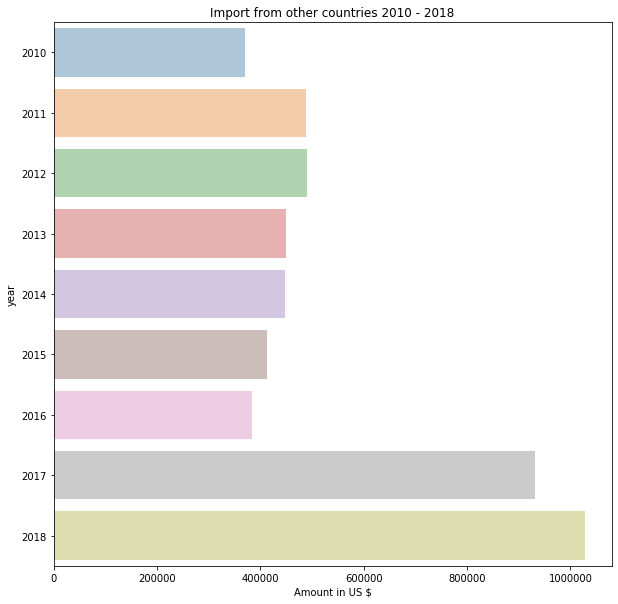

In [16]:

plt.figure(figsize=(10,10))
plt.title("Import from other countries 2010 - 2018")
plt.ylabel("Year 2010-2018")
plt.xlabel("Amount in US $")
sns.barplot(x=imp_years.values , y=imp_years.index , alpha=0.4 ,orient="h" )
plt.show()

# The Country where we're(India) importing Maximum in each years

In [17]:
df_country = df.pivot_table(index="year"  ,columns="country"  , values="value" , aggfunc="sum")

In [18]:
df_country = df_country.unstack().reset_index()

In [19]:
df_country.head()

,country,year,0
0,AFGHANISTAN TIS,2010,146.01
1,AFGHANISTAN TIS,2011,132.49
2,AFGHANISTAN TIS,2012,159.53
3,AFGHANISTAN TIS,2013,208.76
4,AFGHANISTAN TIS,2014,261.92


In [20]:
df_country.rename(columns={0:"Values"} , inplace=True)

In [21]:
df_country.sort_values(by=["year" , "Values"] , ascending=False , inplace=True)

In [22]:
df_country.drop_duplicates(subset="year" , inplace=True)

In [23]:
df_country["year_country"] = df_country["year"].astype("str")+"__" +df_country["country"]

In [24]:
df_country

,country,year,Values,year_country
386,CHINA P RP,2018,140638.58,2018__CHINA P RP
385,CHINA P RP,2017,152760.70,2017__CHINA P RP
384,CHINA P RP,2016,61282.66,2016__CHINA P RP
383,CHINA P RP,2015,61707.54,2015__CHINA P RP
382,CHINA P RP,2014,60412.84,2014__CHINA P RP
381,CHINA P RP,2013,51034.30,2013__CHINA P RP
380,CHINA P RP,2012,52247.97,2012__CHINA P RP
379,CHINA P RP,2011,55313.17,2011__CHINA P RP
378,CHINA P RP,2010,43479.39,2010__CHINA P RP


In [25]:
df_country.drop(["year" , "country"] , axis=1 , inplace=True)

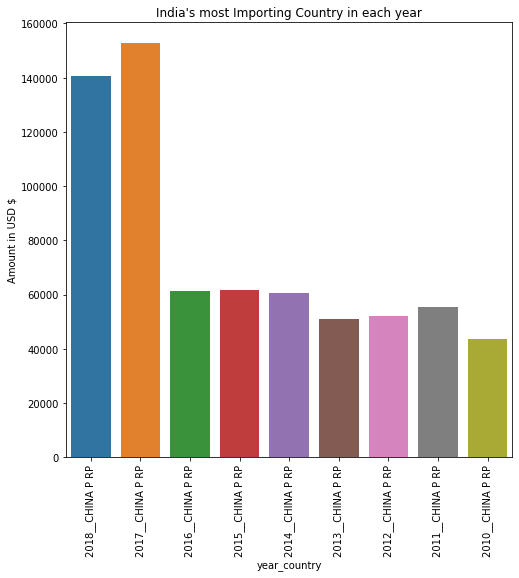

In [26]:
plt.figure(figsize=(8,8))
plt.title("India's most Importing Country in each year")
sns.barplot(x="year_country" , y="Values" , data=df_country)
plt.ylabel("Amount in USD $")
plt.xticks(rotation=90)
plt.show()

A few questions that can be answered using this dataset are: 
1. What did India export the most in any given year?
2. Which commodity forms a major chunk of trade? Does it conform to theories of international trade? 
3. How has the trade between India and any given country grown over time?

#  1 , 2 . What did India export the most in any given year? Which commodity forms a major chunk of trade?


In [115]:
df_hs_count = df.HSCode.value_counts()[:10]

In [116]:
df_hs_code = df[["HSCode" , "Commodity"]].drop_duplicates(subset="HSCode").sort_values(by="HSCode")

In [117]:
df_hs_count = df_hs_count.to_frame()

In [118]:
df_hs_count

,HSCode
85,1933
84,1843
72,1685
39,1597
76,1592
90,1481
74,1363
73,1345
44,1298
41,1271


In [119]:
df_hs_code.head()

,HSCode,Commodity
131,1,LIVE ANIMALS.
215,2,MEAT AND EDIBLE MEAT OFFAL.
132,3,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT..."
133,4,DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...
0,5,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI..."


In [120]:
df_hs_count.rename(columns={"HSCode":"Count"} , inplace=True)

In [121]:
df_hs_count.reset_index(inplace=True)

In [122]:
df_hs_count.rename(columns={"index":"HSCode"} , inplace=True)

In [124]:
df_hs_code

,HSCode,Commodity
131,1,LIVE ANIMALS.
215,2,MEAT AND EDIBLE MEAT OFFAL.
132,3,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT..."
133,4,DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...
0,5,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI..."
134,6,LIVE TREES AND OTHER PLANTS; BULBS; ROOTS AND ...
1,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.
2,8,EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR...
3,9,"COFFEE, TEA, MATE AND SPICES."
138,10,CEREALS.


In [125]:
df_hs_count

,HSCode,Count
0,85,1933
1,84,1843
2,72,1685
3,39,1597
4,76,1592
5,90,1481
6,74,1363
7,73,1345
8,44,1298
9,41,1271


In [129]:
df_hs_count = df_hs_code.join(df_hs_count , on="HSCode" , rsuffix="other" ).dropna()

In [130]:
del df_hs_code

In [136]:
df_hs_count.drop(columns="HSCode" , inplace=True)

In [139]:
df_hs_count.rename(columns={"HSCodeother":"HSCode"} , inplace=True)

In [140]:
df_hs_count

,Commodity,HSCode,Count
131,LIVE ANIMALS.,84.0,1843.0
215,MEAT AND EDIBLE MEAT OFFAL.,72.0,1685.0
132,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...",39.0,1597.0
133,DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...,76.0,1592.0
0,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...",90.0,1481.0
134,LIVE TREES AND OTHER PLANTS; BULBS; ROOTS AND ...,74.0,1363.0
1,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,73.0,1345.0
2,EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR...,44.0,1298.0
3,"COFFEE, TEA, MATE AND SPICES.",41.0,1271.0


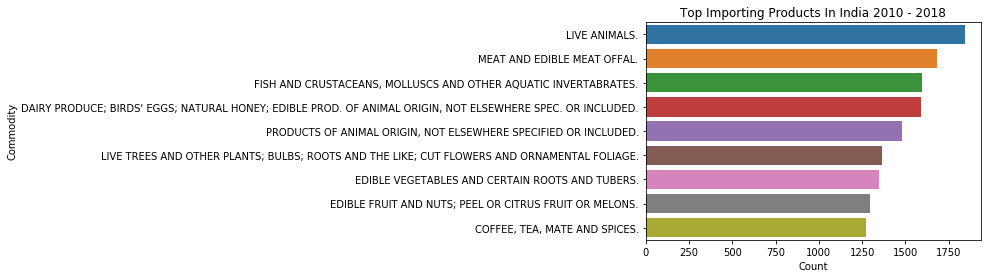

In [144]:
plt.title("Top Importing Products In India 2010 - 2018")
sns.barplot(data=df_hs_count , x="Count" , y="Commodity")

# 3 . Trade grown India between any given country

In [148]:
df.country.unique()

array(['AFGHANISTAN TIS', 'ALBANIA', 'ALGERIA', 'AMERI SAMOA', 'ANDORRA',
       'ANGOLA', 'ANGUILLA', 'ANTARTICA', 'ANTIGUA', 'ARGENTINA',
       'ARMENIA', 'ARUBA', 'AUSTRALIA', 'AUSTRIA', 'AZERBAIJAN',
       'BAHAMAS', 'BAHARAIN IS', 'BANGLADESH PR', 'BARBADOS', 'BELARUS',
       'BELGIUM', 'BELIZE', 'BENIN', 'BERMUDA', 'BHUTAN', 'BOLIVIA',
       'BOSNIA-HRZGOVIN', 'BOTSWANA', 'BR VIRGN IS', 'BRAZIL', 'BRUNEI',
       'BULGARIA', 'BURKINA FASO', 'BURUNDI', 'C AFRI REP', 'CAMBODIA',
       'CAMEROON', 'CANADA', 'CAPE VERDE IS', 'CAYMAN IS', 'CHAD',
       'CHILE', 'CHINA P RP', 'COCOS IS', 'COLOMBIA', 'COMOROS',
       'CONGO D. REP.', 'CONGO P REP', 'COOK IS', 'COSTA RICA',
       "COTE D' IVOIRE", 'CROATIA', 'CUBA', 'CYPRUS', 'CZECH REPUBLIC',
       'DENMARK', 'DJIBOUTI', 'DOMINIC REP', 'DOMINICA', 'ECUADOR',
       'EGYPT A RP', 'EL SALVADOR', 'EQUTL GUINEA', 'ERITREA', 'ESTONIA',
       'ETHIOPIA', 'FAROE IS.', 'FIJI IS', 'FINLAND', 'FR GUIANA',
       'FR POLYNESIA', 'FRANCE'

In [150]:
df.head()

,HSCode,Commodity,value,country,year
0,5,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...",0.00,AFGHANISTAN TIS,2018
1,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,12.38,AFGHANISTAN TIS,2018
2,8,EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR...,268.60,AFGHANISTAN TIS,2018
3,9,"COFFEE, TEA, MATE AND SPICES.",35.48,AFGHANISTAN TIS,2018
5,12,"OIL SEEDS AND OLEA. FRUITS; MISC. GRAINS, SEED...",8.32,AFGHANISTAN TIS,2018


In [172]:
given_country = "CROATIA"

In [175]:
country_df = df.groupby(["country" , "year"]).sum()["value"]

In [176]:
country_df = country_df.to_frame()

In [188]:
country_df.head()

,year,value
452,2010,28.06
453,2011,24.03
454,2012,18.07
455,2013,9.73
456,2014,28.63


In [180]:
country_df.reset_index(inplace=True)

In [ ]:
country_df = country_df.loc[country_df["country"] == given_country][["year" , "value"]]


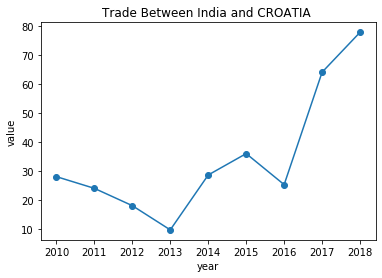

In [189]:

plt.figure()
plt.title(f"Trade Between India and {given_country} ")
plt.scatter(x=country_df.year , y=country_df.value)
sns.lineplot(x="year" , y="value" , data=country_df,)


In [8]:
df["value_year"] = df["value"].groupby(df["year"]).transform("sum")

In [9]:
df

,HSCode,Commodity,value,country,year,value_year
0,5,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...",0.00,AFGHANISTAN TIS,2018,1028142.66
1,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,12.38,AFGHANISTAN TIS,2018,1028142.66
2,8,EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR...,268.60,AFGHANISTAN TIS,2018,1028142.66
3,9,"COFFEE, TEA, MATE AND SPICES.",35.48,AFGHANISTAN TIS,2018,1028142.66
4,11,PRODUCTS OF THE MILLING INDUSTRY; MALT; STARCH...,NaN,AFGHANISTAN TIS,2018,1028142.66
5,12,"OIL SEEDS AND OLEA. FRUITS; MISC. GRAINS, SEED...",8.32,AFGHANISTAN TIS,2018,1028142.66
6,13,"LAC; GUMS, RESINS AND OTHER VEGETABLE SAPS AND...",108.78,AFGHANISTAN TIS,2018,1028142.66
7,20,"PREPARATIONS OF VEGETABLES, FRUIT, NUTS OR OTH...",0.65,AFGHANISTAN TIS,2018,1028142.66
8,25,SALT; SULPHUR; EARTHS AND STONE; PLASTERING MA...,0.05,AFGHANISTAN TIS,2018,1028142.66
9,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",0.00,AFGHANISTAN TIS,2018,1028142.66
